<a href="https://colab.research.google.com/github/ShyamCreation/Crop-and-weed-detection-using-Machine-learning/blob/main/Crop_and_weed_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Yadav Shyam , Email: Yadavshyam7048@gmail.com

**Internship provide by Uniconverge Technologies**
# Crop and weed detection

[Github Repo](https://github.com/ShyamCreation/Crop-and-weed-detection-using-Machine-learning.git)


In [ ]:
print('Happy😊 coding!')

Happy😊 coding!


In [ ]:
# import os

# def count_images_in_folder(folder_path, extensions=['.jpeg', '.jpg', '.png', '.txt']):
#     # Initialize a counter
#     image_count = 0

#     # Iterate over all files in the folder
#     for filename in os.listdir(folder_path):
#         # Check if the file has one of the specified extensions
#         if any(filename.lower().endswith(ext) for ext in extensions):
#             image_count += 1

#     return image_count

# # Specify the folder path
# folder_path = '/content/drive/MyDrive/Uniconverge Tech/Full_data/pro_data'

# # Count the number of images in the folder
# num_images = count_images_in_folder(folder_path)

# # Print the result
# print(f"Number of images in the folder: {num_images}")


In [ ]:
import os

#  image folder
image_folder = '/content/drive/MyDrive/Uniconverge Tech/Full_data/pro_data'

# Initialize counters for each class
crop_count = 0
weed_count = 0

# Iterate through the image files
for file in os.listdir(image_folder):
    if file.endswith('.txt'):  # annotation files are in .txt format
        class_ids = set()  # Use a set to store unique class IDs for each image
        with open(os.path.join(image_folder, file), 'r') as f:
            for line in f.readlines():
                class_id = int(line.split()[0])  # class ID is the first element in the line
                class_ids.add(class_id)
        if 0 in class_ids:  #  0 is the class ID for 'crop'
            crop_count += 1
        if 1 in class_ids:  #  1 is the class ID for 'weed'
            weed_count += 1

print(f'Crop images: {crop_count}')
print(f'Weed images: {weed_count}')

Crop images: 635
Weed images: 635


Number of images: 1268


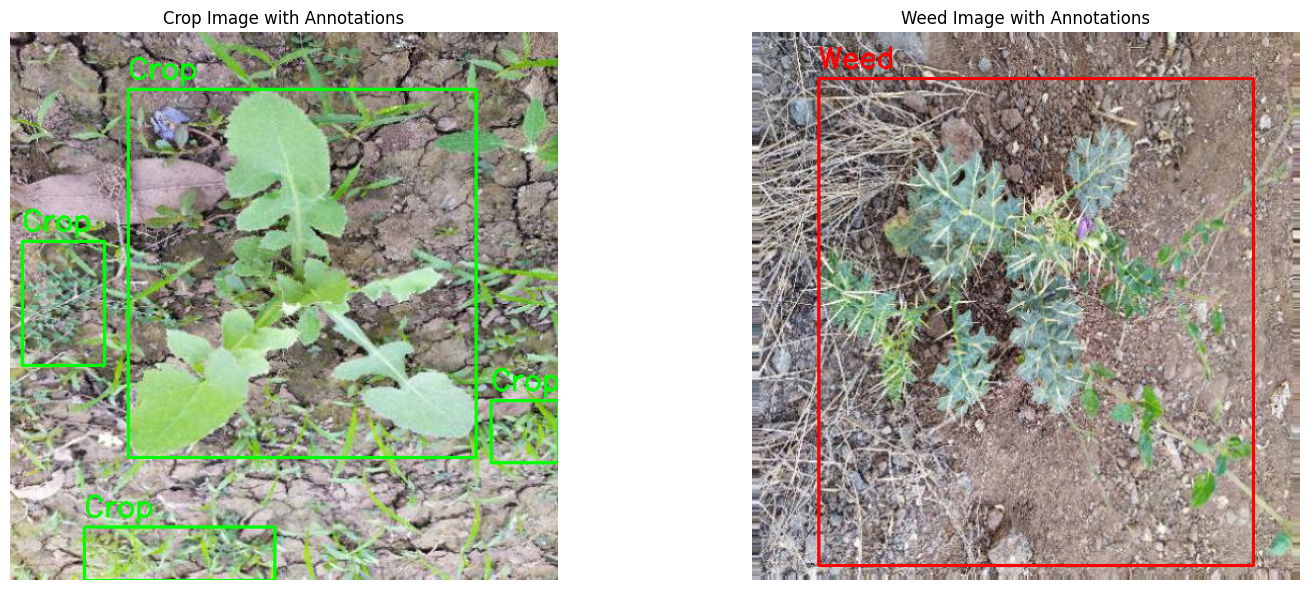

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

def load_image_with_annotations(image_path, annotation_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get image dimensions
    height, width, _ = image.shape

    # Read the annotation file
    with open(annotation_path, 'r') as f:
        annotations = f.readlines()

    # Parse annotations and draw bounding boxes
    for ann in annotations:
        class_id, x_center, y_center, box_width, box_height = map(float, ann.strip().split())

        # Convert YOLO format to pixel coordinates
        x1 = int((x_center - box_width/2) * width)
        y1 = int((y_center - box_height/2) * height)
        x2 = int((x_center + box_width/2) * width)
        y2 = int((y_center + box_height/2) * height)

        # Draw bounding box
        color = (0, 255, 0) if class_id == 0 else (255, 0, 0)  # Green for crop, Red for weed
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Add label
        label = 'Crop' if class_id == 0 else 'Weed'
        cv2.putText(image, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    return image

def count_images_in_folder(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpeg')]
    return len(image_files)

def show_example_images(image_folder):
    crop_image_filename = 'agri_0_106.jpeg'
    crop_annotation_filename = 'agri_0_106.txt'
    weed_image_filename = 'agri_0_113.jpeg'
    weed_annotation_filename = 'agri_0_113.txt'

    crop_image_path = os.path.join(image_folder, crop_image_filename)
    crop_annotation_path = os.path.join(image_folder, crop_annotation_filename)
    weed_image_path = os.path.join(image_folder, weed_image_filename)
    weed_annotation_path = os.path.join(image_folder, weed_annotation_filename)

    crop_image = load_image_with_annotations(crop_image_path, crop_annotation_path)
    weed_image = load_image_with_annotations(weed_image_path, weed_annotation_path)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.imshow(crop_image)
    ax1.axis('off')
    ax1.set_title('Crop Image with Annotations')

    ax2.imshow(weed_image)
    ax2.axis('off')
    ax2.set_title('Weed Image with Annotations')

    plt.tight_layout()
    plt.show()

# Example usage
image_folder = '/content/drive/MyDrive/Uniconverge Tech/Full_data/pro_data'

# Count the images
num_images = count_images_in_folder(image_folder)
print("Number of images:", num_images)

# Show example images
show_example_images(image_folder)

In [ ]:
import keras
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

3.4.1
2.17.0


In [ ]:
from keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [ ]:
import os
import cv2
import numpy as np

# Define constants
IMG_SIZE = (224, 224)  # Input image size
BATCH_SIZE = 32  # Batch size for training

# folder containing images and text files
data_folder = '/content/drive/MyDrive/Uniconverge Tech/Full_data/pro_data'

# Create lists to store images and labels
images = []
labels = []

# Iterate through the folder
for file in os.listdir(data_folder):
    # Check if the file is an image
    if file.endswith('.jpeg'):
        # Read the corresponding text file
        text_file = file.replace('.jpeg', '.txt')
        with open(os.path.join(data_folder, text_file), 'r') as f:
          lines = f.readlines()
          for line in lines:
            class_id, x, y, w, h = line.strip().split()
            class_id = int(class_id)
            x, y, w, h = map(float, [x, y, w, h])

        # Read and preprocess the image
        image = cv2.imread(os.path.join(data_folder, file))
        image = cv2.resize(image, IMG_SIZE)

        # Add to lists
        images.append(image)
        labels.append(class_id)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split data into training and validation sets 70/30
train_images, validation_images = images[:887], images[887:]
train_labels, validation_labels = labels[:887], labels[887:]
from keras.utils import to_categorical




# One-hot encode
train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)


# Create data generators
train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,

    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_generator.flow(train_images, train_labels, batch_size=BATCH_SIZE)

validation_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,

    horizontal_flip=True,
    fill_mode='nearest')
validation_generator = validation_generator.flow(validation_images, validation_labels, batch_size=BATCH_SIZE)

In [ ]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.layers import Dropout

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze initial layers
for layer in base_model.layers:
    layer.trainable = False

# Add new fully connected layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)  # 2 classes: crop and weed

# Define the new model
model = Model(inputs=base_model.input, outputs=x)


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
)

# # Save the model
# model.save('/content/drive/MyDrive/test_dir/vgg16_crop_weed_classifier_3.h5')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7735 - loss: 1.1885 - val_accuracy: 0.9291 - val_loss: 0.3239
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 38s 493ms/step - accuracy: 0.9401 - loss: 0.2103 - val_accuracy: 0.9213 - val_loss: 0.2493
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 508ms/step - accuracy: 0.9369 - loss: 0.2076 - val_accuracy: 0.9396 - val_loss: 0.2496
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 499ms/step - accuracy: 0.9472 - loss: 0.2187 - val_accuracy: 0.9370 - val_loss: 0.2197
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 491ms/step - accuracy: 0.9488 - loss: 0.1739 - val_accuracy: 0.9291 - val_loss: 0.2076
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 503ms/step - accuracy: 0.9462 - loss: 0.1859 - val_accuracy: 0.9396 - val_loss: 0.2100
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 575ms/step - accuracy: 0.9451 - loss: 0.1834 - val_accuracy: 0.9318 - val_loss: 0.2179
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 518ms/step - accuracy: 0.9463 - loss: 0.1788 - val_accuracy: 0.9475 -

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/test_dir/vgg16_crop_weed_classifier_5.keras')

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy:.2f}')
print("Loss:",loss)
print("Accuracy:",accuracy)
print(f'Validation loss: {loss:.4f}')
print(f'Validation metrics: Loss={loss:.4f}, Accuracy={accuracy:.2f}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.9596 - loss: 0.1505
Validation accuracy: 0.94
Loss: 0.2170630395412445
Accuracy: 0.9448819160461426
Validation loss: 0.2171
Validation metrics: Loss=0.2171, Accuracy=0.94


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
Weed


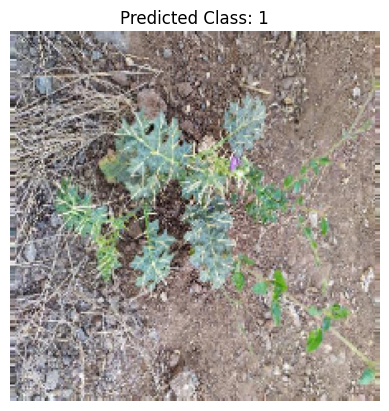

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Load the saved model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/test_dir/vgg16_crop_weed_classifier_5.keras')

# Load a new image
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/crop2.jpg', target_size=(224, 224))
img_array = img_to_array(img)

# Expand dimensions to match model input shape
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions)

# Print the predicted class
if predicted_class == 0:
    print("Crop")
else:
    print("Weed")

plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()